In [1]:
# Linking the drive account
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset
df = pd.read_csv('/content/drive/My Drive/Crime_Data_from_2010_to_2019.csv')

In [4]:
# Checking the first 5 rows of the dataset
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [5]:
# Our dataset consists of 21115474 rows and 28 columns
df.shape 

(2115474, 28)

In [6]:
# Column names and their respective datatypes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115474 entries, 0 to 2115473
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

Date OCC - Date on which crime took place <br>
Time OCC - Time(not able to understand this) <br>
AREA NAME - Name of the Area <br>
Rpt Dist No - 4 digit code that represents a sub area <br>
Crm Cd - The crime code(indicates the crime committed)
Crm Cd Desc - Description of the crime
Vict Age - Victim's age <br>
Vict Sex - Victim's gender <br>
Vict Descent - No idea <br>
Premis Cd - Premis code <br>
Premis Desc - The type of structure, vehicle, or location where the crime took place <br>
Weapon Used Cd - Weapon code <br> 
Weapon Desc - The type of weapon used in the crime <br>
Status - Status of the case <br>
Crm Cd 1,2,3,4 - Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious <br>
Location - Street address of crime incident 
Cross Street - Cross street of rounded address <br>
LAT - Latitude <br>
LON - Longitude

In [ ]:
df['LOCATION']

0            300 E  GAGE                         AV
1                   SEPULVEDA                    BL
2           1300 E  21ST                         ST
3                   CAHUENGA                     BL
4                   8TH                          ST
                             ...                   
2115469     1400 N  LA BREA                      AV
2115470             WILLOUGHBY                   AV
2115471                                         6TH
2115472    17200    NAPA                         ST
2115473     1700    BARRY                        AV
Name: LOCATION, Length: 2115474, dtype: object

In [ ]:
# Description 
df.describe()  

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.115474e+06,2.115474e+06,2.115474e+06,2.115474e+06,2.115474e+06,2.115474e+06,2.115474e+06,2.115421e+06,710520.000000,2.115464e+06,139437.000000,3501.000000,104.000000,2.115474e+06,2.115474e+06
mean,1.479245e+08,1.359848e+03,1.108682e+01,1.155070e+03,1.446048e+00,5.073370e+02,3.176400e+01,3.111915e+02,371.374350,5.071609e+02,949.969678,972.185661,975.105769,3.406377e+01,-1.183088e+02
std,2.887299e+07,6.470984e+02,6.012399e+00,6.012548e+02,4.970808e-01,2.106304e+02,2.064761e+01,2.113124e+02,113.467026,2.104930e+02,125.687041,85.514335,81.276338,7.114890e-01,2.440365e+00
min,1.208575e+06,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.214243e+08,9.300000e+02,6.000000e+00,6.430000e+02,1.000000e+00,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.401050e+01,-1.184364e+02
50%,1.508088e+08,1.430000e+03,1.100000e+01,1.189000e+03,1.000000e+00,4.420000e+02,3.200000e+01,2.100000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.406230e+01,-1.183295e+02
75%,1.715121e+08,1.900000e+03,1.600000e+01,1.668000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417580e+01,-1.182778e+02
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


In [ ]:
# Checking the null values in the dataset
df.isnull().sum() 

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228021
Vict Age                0
Vict Sex           196682
Vict Descent       196728
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1404954
Weapon Desc       1404955
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1976037
Crm Cd 3          2111973
Crm Cd 4          2115370
LOCATION                0
Cross Street      1760079
LAT                     0
LON                     0
dtype: int64

In [ ]:
# Counting number of 0 values in age, since age cant be zero!  We observe that many 0 values are present from plot of age, so we need to correct this
zero_values_age = len(df['Vict Age']) - np.count_nonzero(df["Vict Age"])
zero_values_age

369929

In [ ]:
# Making a copy of the original dataset
df1 = df.copy()

In [ ]:
# Deleting the rows which have the value of age as 0
index = df1[df1['Vict Age'] == 0 ].index # index contains the indices of all the rows which contain the age value as 0
df1.drop(index , inplace=True)

count    1.745545e+06
mean     3.849567e+01
std      1.604784e+01
min     -9.000000e+00
25%      2.600000e+01
50%      3.600000e+01
75%      5.000000e+01
max      1.180000e+02
Name: Vict Age, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


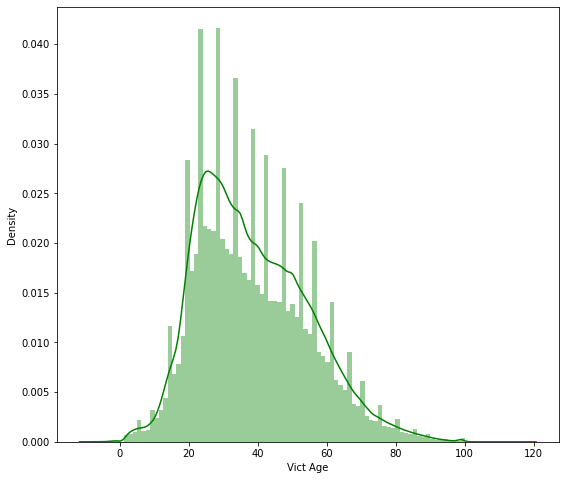

In [ ]:
print(df1['Vict Age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df1['Vict Age'], color='g', bins=100, hist_kws={'alpha': 0.4}); # We obtain a normal distribution for Victim Age

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115474 entries, 0 to 2115473
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [ ]:
print(len(df['Weapon Desc'].unique()))
df['Weapon Desc'].unique()

80


array([nan, 'HAND GUN', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT', 'SIMULATED GUN',
       'FOLDING KNIFE', 'OTHER KNIFE', 'MACE/PEPPER SPRAY', 'STICK',
       'UNKNOWN FIREARM', 'SWITCH BLADE',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'BOARD', 'BLUNT INSTRUMENT',
       'SEMI-AUTOMATIC PISTOL', 'VEHICLE', 'OTHER CUTTING INSTRUMENT',
       'SCISSORS', 'BOTTLE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'BELT FLAILING INSTRUMENT/CHAIN',
       'AUTOMATIC WEAPON/SUB-MACHINE GUN', 'CLUB/BAT', 'BRASS KNUCKLES',
       'KITCHEN KNIFE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'SCREWDRIVER',
       'FIRE', 'STUN GUN', 'RIFLE', 'RAZOR BLADE', 'DIRK/DAGGER',
       'CAUSTIC CHEMICAL/POISON', 'SHOTGUN', 'ICE PICK', 'BOMB THREAT',
       'ROCK/THROWN OBJECT', 'REVOLVER', 'OTHER FIREARM', 'DEMAND NOTE',
       'BOWIE KNIFE', 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE',
       'SCALDING LIQUID', 'ROPE/LIGATURE', 'MACHETE', 'T

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text major ticklabel objects>)

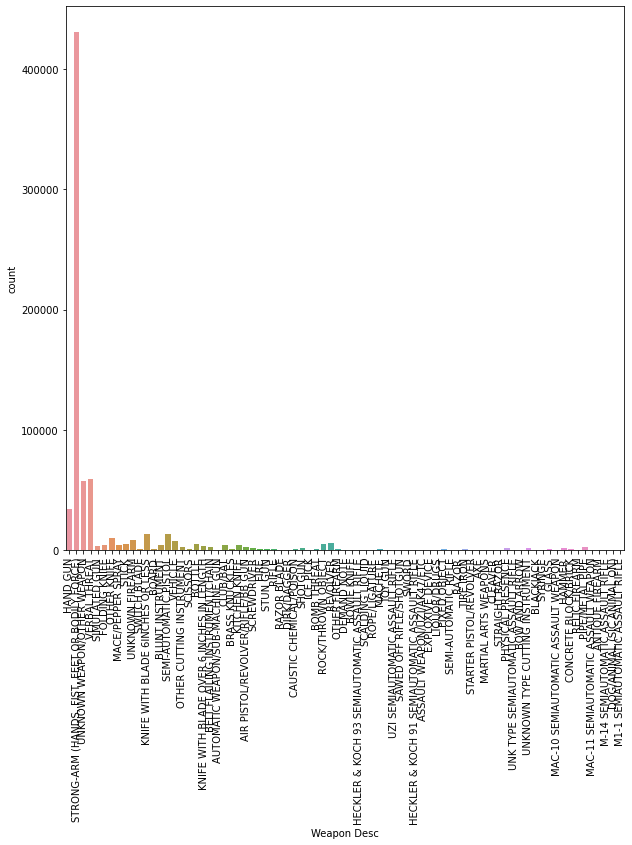

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['Weapon Desc'])
plt.xticks(rotation=90)

In [ ]:
df['Weapon Desc'].value_counts(ascending=False)[0:10]

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    430750
VERBAL THREAT                                      58660
UNKNOWN WEAPON/OTHER WEAPON                        57433
HAND GUN                                           34114
SEMI-AUTOMATIC PISTOL                              12905
KNIFE WITH BLADE 6INCHES OR LESS                   12844
OTHER KNIFE                                         9785
UNKNOWN FIREARM                                     7902
VEHICLE                                             7237
REVOLVER                                            5565
Name: Weapon Desc, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


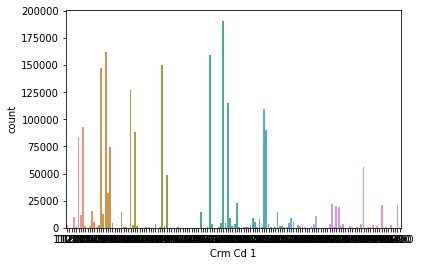

In [ ]:
sns.countplot(df['Crm Cd 1']) # Crm Cd 1 refers to the category of most serious crimes

In [ ]:
print(len(df['Crm Cd 1'].unique()))
df['Crm Cd 1'].unique()

149


array([900., 740., 946., 122., 442., 330., 230., 341., 624., 210., 755.,
       237., 236., 626., 440., 930., 220., 745., 310., 648., 121., 761.,
       647., 343., 627., 251., 331., 510., 920., 110., 441., 350., 888.,
       910., 520., 860., 649., 623., 235., 886., 625., 901., 762., 812.,
       354., 231., 813., 821., 820., 943., 420., 956., 932., 850., 480.,
       410., 320., 763., 928., 810., 664., 902., 662., 668., 815., 940.,
       352., 670., 351., 756., 660., 951., 434., 653., 753., 950., 450.,
       661., 806., 805., 453., 443., 437., 345., 438., 933., 654., 651.,
       922., 903., 944., 421., 353., 622., 949., 435., 474., 347., 666.,
       880., 473., 439., 451., 487., 250., 433., 430., 954., 890., 472.,
       865., 882., 840.,  nan, 942., 436., 924., 870., 475., 444., 446.,
       948., 471., 470., 652., 234., 113., 452., 349., 822., 760., 845.,
       485., 884., 521., 931., 999., 921., 814., 952., 830., 445., 486.,
       432., 111., 431., 906., 522., 905.])

Text(0.5, 1.0, 'Number of crimes committed')

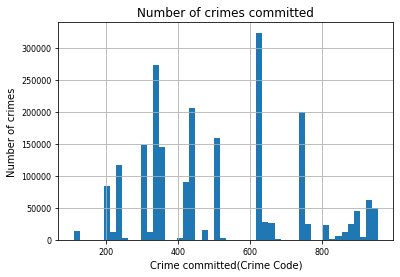

In [ ]:
df['Crm Cd'].hist(bins=50, xlabelsize=8, ylabelsize=8)
plt.xlabel('Crime committed(Crime Code)')
plt.ylabel('Number of crimes')
plt.title('Number of crimes committed') # Its the crime code so histogram will is not much useful

In [ ]:
print(len(df['Crm Cd Desc'].unique()))

142


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


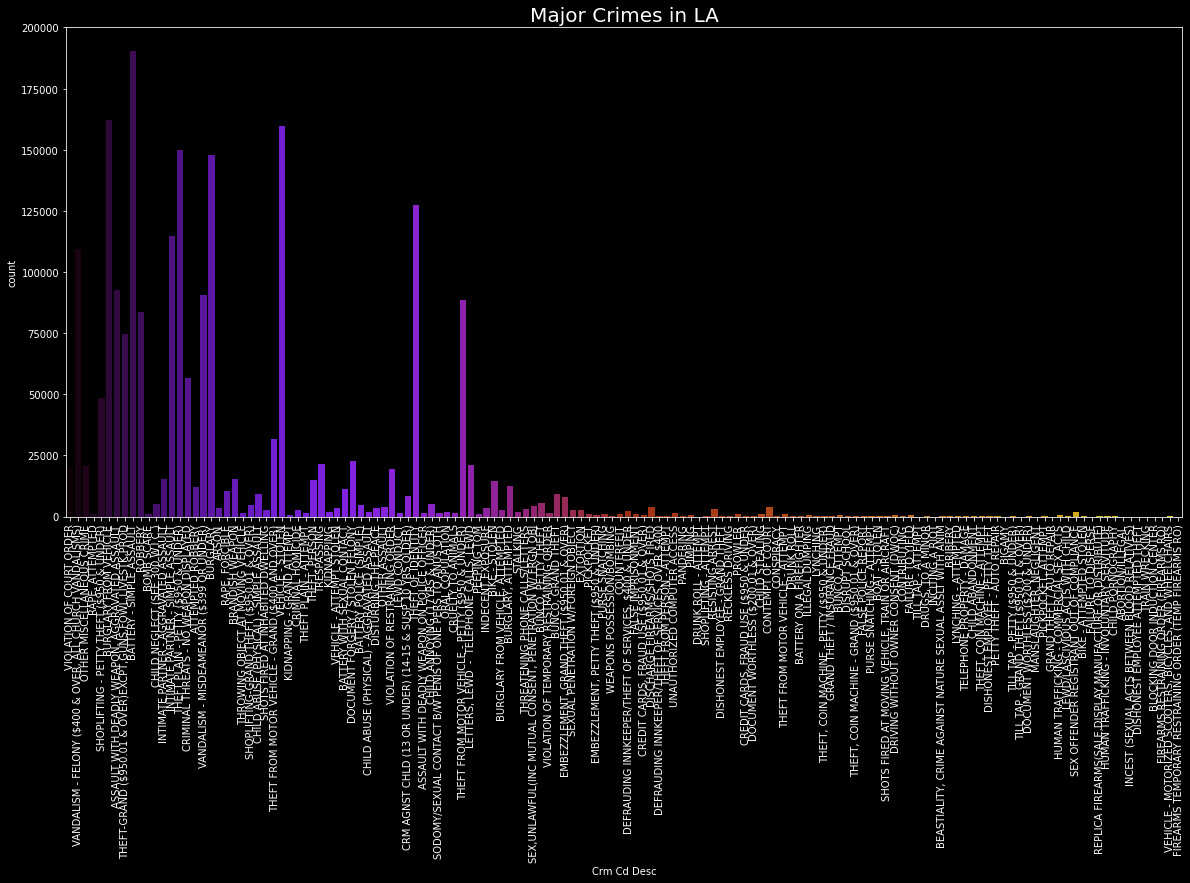

In [ ]:
# The different categories of crime

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['Crm Cd Desc'], palette = 'gnuplot')

plt.title('Major Crimes in LA', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# The most probable crimes
df['Crm Cd Desc'].value_counts(ascending=False)[0:20]

BATTERY - SIMPLE ASSAULT                                    190548
BURGLARY FROM VEHICLE                                       162167
VEHICLE - STOLEN                                            159857
THEFT PLAIN - PETTY ($950 & UNDER)                          149829
BURGLARY                                                    147663
THEFT OF IDENTITY                                           127267
INTIMATE PARTNER - SIMPLE ASSAULT                           114548
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     109442
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               92703
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     90428
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              88486
ROBBERY                                                      83852
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     74566
CRIMINAL THREATS - NO WEAPON DISPLAYED                       56644
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     4

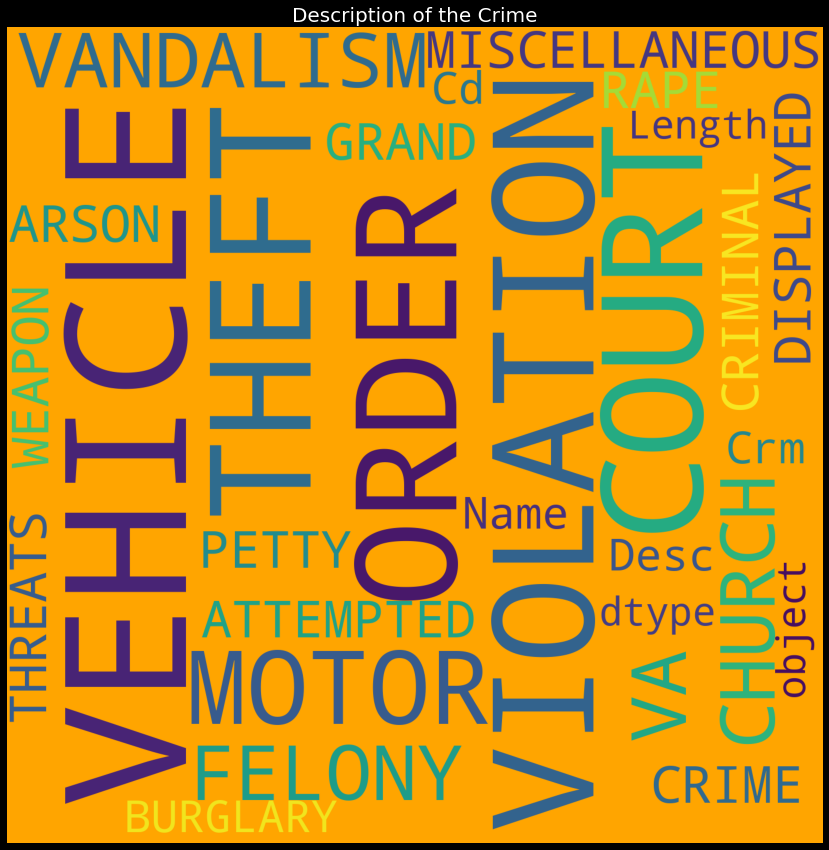

In [ ]:
# Description of the crime (using a word cloud)

from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(df['Crm Cd Desc']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

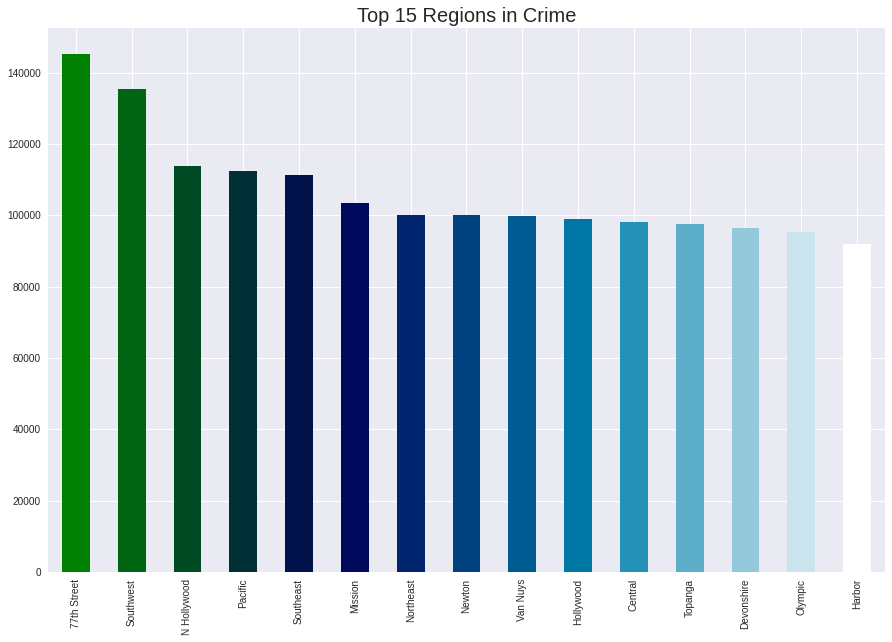

In [ ]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.ocean(np.linspace(0, 1, 15))
df['AREA NAME'].value_counts().head(15).plot.bar(color = color, figsize = (15, 10))

plt.title('Top 15 Regions in Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()  # We observe that the maximum number of crimes took place in the 77th street

In [ ]:
pip install folium

In [ ]:
import folium

In [ ]:
# Latitude and Longitude of Los Angeles
latitude = 34.052235
longitude = -118.243683
la_map = folium.Map(location=[latitude, longitude], zoom_start=5) # Creating a map with with the lat,long values

In [ ]:
df_fivehun = df.iloc[0:500,:] # Selecting the first 500 locations

In [ ]:
# Plotting the map of Los Angeles
for lat, lon, location in zip(df_fivehun['LAT'], df_fivehun['LON'], df_fivehun['LOCATION']):
    label = '{}'.format(location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup = label,
        color='b',
        fill_color='#3186cc',
        fill=True,
        fill_opacity=0.7
        ).add_to(la_map)
la_map


## Checking Correlation

In [ ]:
df.corr()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
DR_NO,1.000000,-0.012509,0.000498,0.000575,-0.021225,-0.003661,0.011187,-0.015605,0.009459,-0.004083,-0.098026,0.014184,0.120927,0.013894,-0.014062
TIME OCC,-0.012509,1.000000,0.011900,0.012100,-0.056539,0.012371,-0.049029,-0.090078,-0.002365,0.012429,0.009793,-0.000402,-0.098232,0.001502,-0.000709
AREA,0.000498,0.011900,1.000000,0.999009,0.004210,-0.004013,0.003581,0.009212,-0.004057,-0.004150,-0.055371,-0.027881,0.026340,0.061740,-0.021016
Rpt Dist No,0.000575,0.012100,0.999009,1.000000,0.004028,-0.004078,0.003828,0.009139,-0.003907,-0.004215,-0.054729,-0.026421,0.027684,0.061344,-0.021123
Part 1-2,-0.021225,-0.056539,0.004210,0.004028,1.000000,0.732759,0.136496,0.230682,0.431994,0.733009,0.076457,-0.043998,0.111984,0.000237,0.002615
Crm Cd,-0.003661,0.012371,-0.004013,-0.004078,0.732759,1.000000,-0.037123,0.104793,0.420085,0.999510,0.044201,0.108360,0.057467,-0.000045,0.001623
Vict Age,0.011187,-0.049029,0.003581,0.003828,0.136496,-0.037123,1.000000,0.166341,0.081566,-0.036965,-0.029530,-0.036517,-0.112472,0.005144,-0.003629
Premis Cd,-0.015605,-0.090078,0.009212,0.009139,0.230682,0.104793,0.166341,1.000000,0.210993,0.104845,-0.046011,-0.026949,0.146040,0.004772,-0.002523
Weapon Used Cd,0.009459,-0.002365,-0.004057,-0.003907,0.431994,0.420085,0.081566,0.210993,1.000000,0.420575,-0.131115,-0.023443,-0.073590,0.005232,-0.000710
Crm Cd 1,-0.004083,0.012429,-0.004150,-0.004215,0.733009,0.999510,-0.036965,0.104845,0.420575,1.000000,0.057828,0.141067,0.047693,-0.000014,0.001592


In [ ]:
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228021
Vict Age                0
Vict Sex           196682
Vict Descent       196728
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1404954
Weapon Desc       1404955
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1976037
Crm Cd 3          2111973
Crm Cd 4          2115370
LOCATION                0
Cross Street      1760079
LAT                     0
LON                     0
dtype: int64

In [ ]:
df2 = df.copy()
df2.drop(['Mocodes','Vict Sex','Vict Descent','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street'],axis=1,inplace=True)

In [ ]:
df2.isnull().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Status          3
Status Desc     0
Crm Cd 1       10
LOCATION        0
LAT             0
LON             0
dtype: int64

In [ ]:
df2.corr()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Crm Cd 1,LAT,LON
DR_NO,1.000000,-0.012509,0.000498,0.000575,-0.021225,-0.003661,0.011187,-0.004083,0.013894,-0.014062
TIME OCC,-0.012509,1.000000,0.011900,0.012100,-0.056539,0.012371,-0.049029,0.012429,0.001502,-0.000709
AREA,0.000498,0.011900,1.000000,0.999009,0.004210,-0.004013,0.003581,-0.004150,0.061740,-0.021016
Rpt Dist No,0.000575,0.012100,0.999009,1.000000,0.004028,-0.004078,0.003828,-0.004215,0.061344,-0.021123
Part 1-2,-0.021225,-0.056539,0.004210,0.004028,1.000000,0.732759,0.136496,0.733009,0.000237,0.002615
Crm Cd,-0.003661,0.012371,-0.004013,-0.004078,0.732759,1.000000,-0.037123,0.999510,-0.000045,0.001623
Vict Age,0.011187,-0.049029,0.003581,0.003828,0.136496,-0.037123,1.000000,-0.036965,0.005144,-0.003629
Crm Cd 1,-0.004083,0.012429,-0.004150,-0.004215,0.733009,0.999510,-0.036965,1.000000,-0.000014,0.001592
LAT,0.013894,0.001502,0.061740,0.061344,0.000237,-0.000045,0.005144,-0.000014,1.000000,-0.989868
LON,-0.014062,-0.000709,-0.021016,-0.021123,0.002615,0.001623,-0.003629,0.001592,-0.989868,1.000000


## Checking Nulls


In [ ]:
# Checking the null values in the dataset
df.isnull().sum() 

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            228021
Vict Age                0
Vict Sex           196682
Vict Descent       196728
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1404954
Weapon Desc       1404955
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1976037
Crm Cd 3          2111973
Crm Cd 4          2115370
LOCATION                0
Cross Street      1760079
LAT                     0
LON                     0
dtype: int64

In [ ]:
# Checking percentage of nan values greater than particular threshold
nan_list = [(i,df[i].isnull().sum()/len(df[i])) for i in list(df.columns.values) if df[i].isnull().sum()/len(df[i])>0.3]
nan_list

[('Weapon Used Cd', 0.6641320101310628),
 ('Weapon Desc', 0.6641324828383616),
 ('Crm Cd 2', 0.9340871123918327),
 ('Crm Cd 3', 0.998345051747268),
 ('Crm Cd 4', 0.9999508384409357),
 ('Cross Street', 0.8320021895802076)]

In [ ]:
# The percentage of null values in Crm Cd 2,Crm Cd 3,Crm Cd 4 are very high(more than 90% and almost 100% so we remove these 3 columns)
df.drop(['Crm Cd 2','Crm Cd 3','Crm Cd 4'],axis=1,inplace=True)

In [ ]:
df['Cross Street'].unique()

array([nan, 'MANCHESTER                   AV',
       'HOLLYWOOD                    BL', ...,
       'E  MATEO                        ST', 'W  6TH',
       'EDGEWATER                    AV'], dtype=object)

In [ ]:
df['LOCATION'].unique()

array(['300 E  GAGE                         AV',
       'SEPULVEDA                    BL',
       '1300 E  21ST                         ST', ...,
       '2400 E  CENTURY                      BL',
       '8300    81ST                         ST', '4500    ALAMEDA'],
      dtype=object)

There are a lot of missing values in our dataset and we have to clean the dataset using appropriate techniques.The cleaning method for these values varies on the purpose at the time of doing it.Hence, we decided not to clean then simply for the purpose of showing it at this stage. For convenience, the column ' Vict Age' is cleaned (all NaN values are discarded) and EDA is performed. The other attributes will be dealt with as and when the inference/model needs it. 
   Our general approach would be : For numerical variables we can use mean/median imputation(replacing the null values with the mean/median). If the feature contains outliers then we go with the median. For categorical variables we replace the mean with the mode of that feature(the value which has appeared the most).
For columns like Crm Cd 2,Crm Cd 3,Crm Cd 4 the number of null values are very much higher than the non-null values so these  columns will either be dropped or rarely used.
  For columns like Weapon Used Cd,Weapon Desc the % of nulls are 66% so we will either fill the missing values with the mode or apply KNN imputation.

## Checking Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


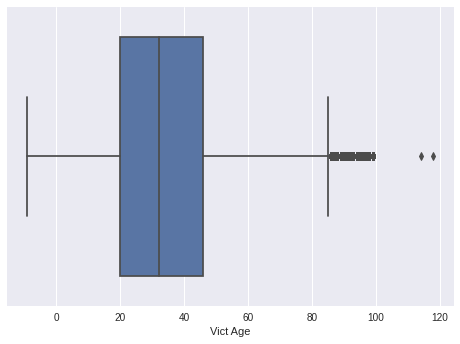

In [ ]:
# Boxplot for the Victim Age column - checking for outliers
sns.boxplot(df['Vict Age'])

In [ ]:
Q1 = df['Vict Age'].quantile(0.25)
Q3 = df['Vict Age'].quantile(0.75)
IQR = Q3 - Q1 # Inter Quartile Range
print(IQR)
print(Q1)
print(Q3)

26.0
20.0
46.0


In [ ]:
len(df[df['Vict Age'] > 46]) # There are 526707 outliers in the Victim Age column

526707

I feel only Victim Age is the only proper numerical continuous variable. Other columns such as Crm Cd, Weapon Cd are just codes so they are discrete and not continuous. So I feel we cannot check outliers through histogram. <br>
For codes what else can we do? We can plot the barplot(for the frequency)-its same as barplot for description <br>
For categorical maybe we can calcuate the values with very low frequency,but I guess there's nothing like outlier in categorical variables

In [ ]:
# yeah for discrete, can we do binning...?
# but this may not work in all cases, as in for weapon id, we could use a different kind of plot based
# on mode inorder to find which weapon was most used
